In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import random  
import copy 
import numpy as np 

In [39]:
def initializeMap(p_zero, N):
    amap = np.zeros((N,N))
    for i in range(0, N):
        for j in range(0, i):
            if random.random() > p_zero:
                amap[i][j] = random.random()
                amap[j][i] = the_map[i][j]
                
    return amap 

In [31]:
def initializeComplexMap(p_zero, N, groups):
    amap = np.zeros((N,N))

    for i in range(0, N):
        for j in range(0, i):
            group_i = int(i/(N/groups))
            group_j = int(j/(N/groups))

            if random.random() > p_zero and abs(group_i - group_j) <= 1:
                amap[i][j] = random.random()
                amap[j][i] = amap[i][j]

    ax = sns.heatmap(amap)
    plt.show()
    return amap

In [38]:
def createStartingPopulation(size, the_map):
    population = []
    for i in range(0,size):
        population.append(createNewMember(the_map))
        
    return population

In [15]:
def crossover(a, b):
    common_elements = set(a) & set(b)
    if len(common_elements) == 2:
        return (a, b)
    else:
        common_elements.remove(0)
        common_elements.remove(max(a)) 
        value = random.sample(common_elements, 1)        
    
    cut_a = np.random.choice(np.where(np.isin(a, value))[0])
    cut_b = np.random.choice(np.where(np.isin(b, value))[0])
    
    new_a1 = copy.deepcopy(a[0:cut_a])
    new_a2 = copy.deepcopy(b[cut_b:])
    
    new_b1 = copy.deepcopy(b[0:cut_b])
    new_b2 = copy.deepcopy(a[cut_a:])
    
    new_a = np.append(new_a1, new_a2)
    new_b = np.append(new_b1, new_b2)
       
    return (new_a, new_b)

In [16]:
def mutate(route, probability, the_map):
    new_route = copy.deepcopy(route)
    
    for i in range(1, len(new_route)):
        if random.random() < probability:
            go = True
            while go:
                possible_values = np.nonzero(the_map[new_route[i-1]])
                proposed_value = random.randint(0,len(possible_values[0])-1)
                route = np.append(new_route, possible_values[0][proposed_value])

                if new_route[i] == len(the_map)-1:
                    go = False
                else:
                    i += 1
    
    return new_route

In [40]:
def createNewMember(the_map):
    N = len(the_map)
    route = np.zeros(1, dtype=int)
    go = True
    i = 1
    while go:
        possible_values = np.nonzero(the_map[route[i-1]])
        proposed_value = random.randint(0,len(possible_values[0])-1)
        route = np.append(route, possible_values[0][proposed_value])
                
        if route[i] == N-1:
            go = False
        else:
            i += 1
    
    return route

In [42]:
def scorePopulation(population, the_map):
    scores = []
    for i in range(0, len(population)):
        scores += [fitness(population[i], the_map)]
        
    return scores

In [51]:
def pickMate(scores):
    array = np.array(scores)
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))

    fitness = [len(ranks) - x for x in ranks]
    cum_scores = copy.deepcopy(fitness)
    for i in range(1,len(cum_scores)):
        cum_scores[i] = fitness[i] + cum_scores[i-1]
        
    probs = [x / cum_scores[-1] for x in cum_scores]
    rand = random.random()
    for i in range(0, len(probs)):
        if rand < probs[i]:
            return i

In [45]:
def fitness(route, amap):
    score = 0
    for i in range(1, len(route)):
        if (amap[route[i-1]][route[i]] == 0) and i != len(amap)-1:
            print("WARNING: INVALID ROUTE")
            print(route)
            print(amap)
        score = score + amap[route[i-1]][route[i]]

    return score

In [24]:
def plotBest(amap,  route, iterNum): 
    ax = sns.heatmap(amap)
    
    x = [0.5] + [x + 0.5 for x in route[0:len(route)-1]] + [len(amap) - 0.5] 
    y = [0.5] + [x + 0.5 for x in route[1:len(route)]] + [len(amap) - 0.5] 
    
    plt.plot(x,y, marker='o', linewidth=4, markersize=12, linestyle="-", color='white') 
    plt.savefig('images/new100plot_%i.png' % (iterNum), dpi=300)
    plt.show()


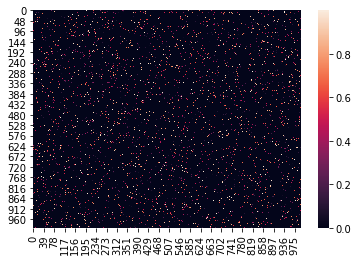

Iterations 0: best so far is 56 steps for a distance of 28.038395


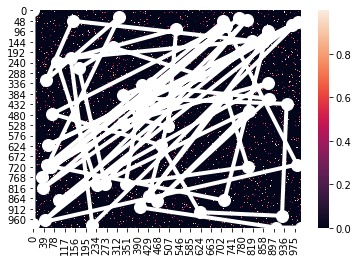

Iterations 1: best so far is 44 steps for a distance of 24.157253


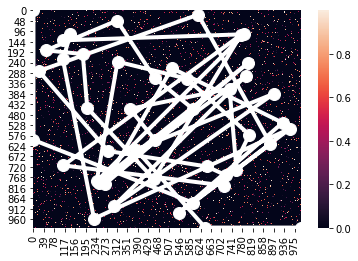

Iterations 2: best so far is 33 steps for a distance of 16.193088


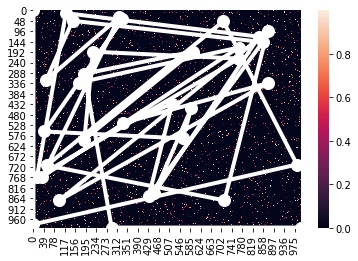

Iterations 3: best so far is 33 steps for a distance of 15.727798


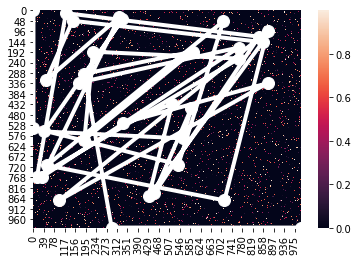

Iterations 5: best so far is 25 steps for a distance of 10.143843


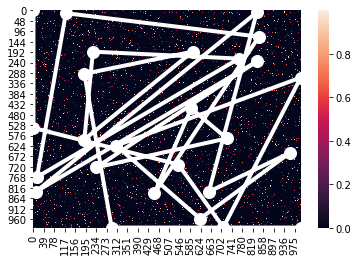

Iterations 8: best so far is 8 steps for a distance of 2.784622


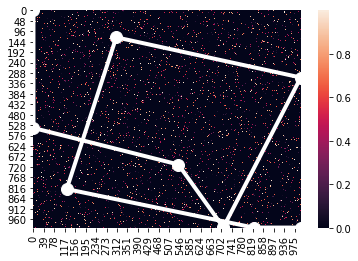

Iterations 11: best so far is 6 steps for a distance of 1.699093


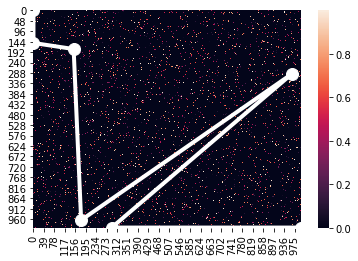

Iterations 66: best so far is 3 steps for a distance of 0.941691


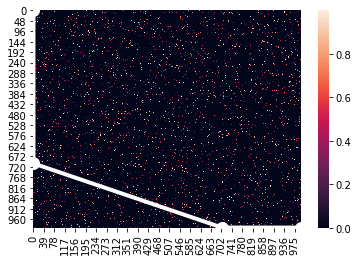

Iterations 96: best so far is 3 steps for a distance of 0.871931


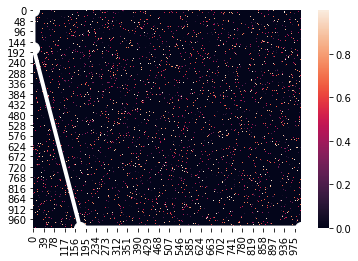

Iterations 117: best so far is 4 steps for a distance of 0.799125


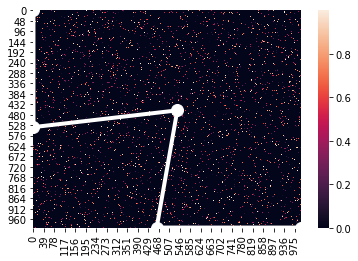

Iterations 198: best so far is 4 steps for a distance of 0.515019


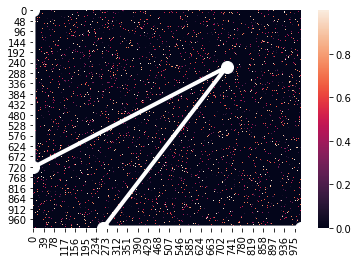

In [ ]:
sparsenessOfMap = 0.95
sizeOfMap = 1000 
populationSize = 30 
numIterations = 1000 
numCouples = 9 
numWinnerToKeep = 2 
mutationProb = 0.05 
numOfGroups = 1 

amap = initializeComplexMap(sparsenessOfMap, sizeOfMap, numOfGroups)
population = createStartingPopulation(populationSize, amap)

lastDist = 1000000000

for i in range(0, numIterations): 
    newPop = [] 
    scores = scorePopulation(population, amap)
    
    best = population[np.argmin(scores)]
    numOfMoves = len(best)
    dist = fitness(best, amap)
    
    if dist != lastDist: 
        print("Iterations %i: best so far is %i steps for a distance of %f" % (i, numOfMoves, dist))
        plotBest(amap, best, i)
    
    for j in range(0, numCouples):
        new1, new2 = crossover(population[pickMate(scores)], population[pickMate(scores)])
        newPop = newPop + [new1, new2]
        
    for j in range(0, len(newPop)): 
        newPop[j] = np.copy(mutate(newPop[j], 0.05, amap))
        
    newPop += [population[np.argmin(scores)]]
    for j in range(1, numWinnerToKeep): 
        keeper = pickMate(scores)
        newPop += [population[keeper]]
        
    while len(newPop) < populationSize:
        newPop += [createNewMember(amap)]
    
    population = copy.deepcopy(newPop)
    lastDist = dist 